

# Compare two simulations


flowline/flow_line_Ronnie1
flowline/flow_line_Ronnie2
flowline/flow_line_Ronnie3
flowline/flow_line_Ronnie4
flowline/flow_line_Ronnie5


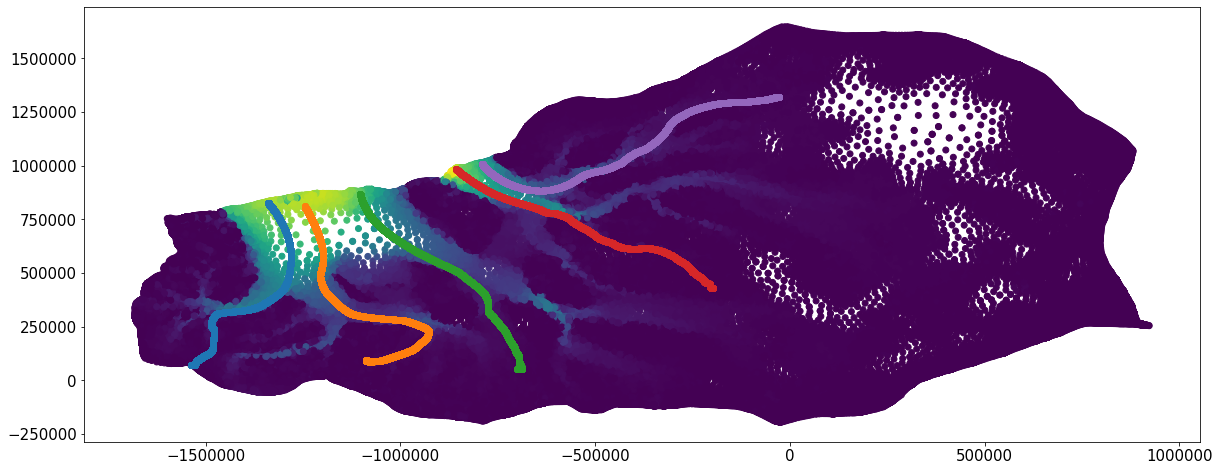

In [1]:
import glob
import numpy as np
import psutil
import pyvista as pv
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.interpolate import griddata


size = 20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


def stat(x):
    mean = np.nanmean(x)
    median = np.nanquantile(x, 0.5)
    quartile1 = np.nanquantile(x, 0.25)
    quartile3 = np.nanquantile(x, 0.75)
    std = np.nanstd(x)
    return mean, median, quartile1, quartile3, std


def get_human_readable_size(num):
    # https://stackoverflow.com/questions/21792655/psutil-virtual-memory-units-of-measurement
    exp_str = [(0, 'B'), (10, 'KB'), (20, 'MB'),
               (30, 'GB'), (40, 'TB'), (50, 'PB'), ]
    i = 0
    while i+1 < len(exp_str) and num >= (2 ** exp_str[i+1][0]):
        i += 1
        rounded_val = round(float(num) / 2 ** exp_str[i][0], 2)
    return '%s %s' % (int(rounded_val), exp_str[i][1])


def check_virtual_memory():
    # https://psutil.readthedocs.io/en/latest/#psutil.virtual_memory
    values = psutil.virtual_memory()
    print("Virtual memory usage - " +
          "total: " + str(get_human_readable_size(values.total)) + " / " +
          "available: " + str(get_human_readable_size(values.available)) + " / " +
          "percent used: " + str(values.percent) + " %"
          )


# load data 1
url='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_MUMPS_R1/'
url1='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_sansDHDt_avecVisco_R4/'
files = sorted(glob.glob(url + 'mesh_24/OPTIM_sansDHDT_avecVisco_R2__t*.pvtu'))
figure='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/'
flowlines=np.sort(glob.glob('/home/urrutyb/Documents/PhD_TiPACCS/data_antarctica/flowline/flow_line_Ronnie*.csv'))


# figure=url + 'figure/'
files = sorted(files)


blocks = pv.MultiBlock([pv.read(f) for f in files])
# for i, block in enumerate(blocks):
#     block["node_value"] = np.full(block.n_points, i)

# load data 2
files = sorted(glob.glob(url1 + 'mesh_24/OPTIM_sansDHDT_avecVisco_R4__t*.pvtu'))
files = sorted(files)


blocks1 = pv.MultiBlock([pv.read(f) for f in files])
# for i, block in enumerate(blocks1):
#     block["node_value"] = np.full(block.n_points, i)

x=blocks[0].points[:,0]
y=blocks[0].points[:,1]

meth='linear'
plt.figure()
plt.scatter(x,y,c=np.sqrt(blocks[0].point_arrays['uobs'][:,0]**2+blocks[0].point_arrays['uobs'][:,1]**2))
for n in range(0,len(flowlines)):
    x_fl,y_fl=np.loadtxt(flowlines[n],skiprows=1,delimiter=',',usecols=(22,23),unpack=True)
    plt.scatter(x_fl,y_fl)
    eta=np.zeros([len(blocks),len(x_fl)])
    beta=np.zeros([len(blocks),len(x_fl)])
    djdbeta=np.zeros([len(blocks),len(x_fl)])
    djdeta=np.zeros([len(blocks),len(x_fl)])
    groundedmask=np.zeros([len(blocks),len(x_fl)])
    bedrock=np.zeros([len(blocks),len(x_fl)])
    zs=np.zeros([len(blocks),len(x_fl)])
    zb=np.zeros([len(blocks),len(x_fl)])
    alpha=np.zeros([len(blocks),len(x_fl)])
    mu=np.zeros([len(blocks),len(x_fl)])
    pdc_melt=np.zeros([len(blocks),len(x_fl)])
    h=np.zeros([len(blocks),len(x_fl)])
    uobs_mag=np.zeros([len(blocks),len(x_fl)])
    smb=np.zeros([len(blocks),len(x_fl)])
    pdc_area=np.zeros([len(blocks),len(x_fl)])
    ssavelocity_mag=np.zeros([len(blocks),len(x_fl)])
    dist=np.zeros(len(x_fl))
    eta1=np.zeros([len(blocks1),len(x_fl)])
    beta1=np.zeros([len(blocks1),len(x_fl)])
    djdbeta1=np.zeros([len(blocks1),len(x_fl)])
    djdeta1=np.zeros([len(blocks1),len(x_fl)])
    groundedmask1=np.zeros([len(blocks1),len(x_fl)])
    alpha1=np.zeros([len(blocks1),len(x_fl)])
    mu1=np.zeros([len(blocks1),len(x_fl)])
    ssavelocity_mag1=np.zeros([len(blocks1),len(x_fl)])
    for i in range(0,len(x_fl)-1):
        dist[i+1]=dist[i]+np.sqrt((x_fl[i]-x_fl[i+1])**2+(y_fl[i]-y_fl[i+1])**2)/1000
    for i in range(0,len(blocks)):
        eta[i,]=griddata((x,y),blocks[i].point_arrays['eta'],(x_fl,y_fl), method=meth)
        beta[i,]=griddata((x,y),blocks[i].point_arrays['beta'],(x_fl,y_fl), method=meth)
        djdbeta[i,]=griddata((x,y),blocks[i].point_arrays['djdbeta'],(x_fl,y_fl), method=meth)
        djdeta[i,]=griddata((x,y),blocks[i].point_arrays['djdeta'],(x_fl,y_fl), method=meth)
        groundedmask[i,]=griddata((x,y),blocks[i].point_arrays['groundedmask'],(x_fl,y_fl), method=meth)
        bedrock[i,]=griddata((x,y),blocks[i].point_arrays['bedrock'],(x_fl,y_fl), method=meth)
        zs[i,]=griddata((x,y),blocks[i].point_arrays['zs'],(x_fl,y_fl), method=meth)
        zb[i,]=griddata((x,y),blocks[i].point_arrays['zb'],(x_fl,y_fl), method=meth)
        alpha[i,]=griddata((x,y),blocks[i].point_arrays['alpha'],(x_fl,y_fl), method=meth)
        mu[i,]=griddata((x,y),blocks[i].point_arrays['mu'],(x_fl,y_fl), method=meth)
        pdc_melt[i,]=griddata((x,y),blocks[i].point_arrays['pdc_melt'],(x_fl,y_fl), method=meth)
        h[i,]=griddata((x,y),blocks[i].point_arrays['h'],(x_fl,y_fl), method=meth)
        uobs=blocks[i].point_arrays['uobs']
        uobs_mag[i,]=griddata((x,y),np.sqrt(uobs[:,0]**2+uobs[:,1]**2),(x_fl,y_fl), method=meth)
        smb[i,]=griddata((x,y),blocks[i].point_arrays['smb'],(x_fl,y_fl), method=meth)
        pdc_area[i,]=griddata((x,y),blocks[i].point_arrays['pdc_area'],(x_fl,y_fl), method=meth)
        ssavelocity=blocks[i].point_arrays['ssavelocity']
        ssavelocity_mag[i,:]=griddata((x,y),np.sqrt(ssavelocity[:,0]**2+ssavelocity[:,1]**2),(x_fl,y_fl), method=meth)
        eta1[i,]=griddata((x,y),blocks1[i].point_arrays['eta'],(x_fl,y_fl), method=meth)
        beta1[i,]=griddata((x,y),blocks1[i].point_arrays['beta'],(x_fl,y_fl), method=meth)
        djdbeta1[i,]=griddata((x,y),blocks1[i].point_arrays['djdbeta'],(x_fl,y_fl), method=meth)
        djdeta1[i,]=griddata((x,y),blocks1[i].point_arrays['djdeta'],(x_fl,y_fl), method=meth)
        groundedmask1[i,]=griddata((x,y),blocks1[i].point_arrays['groundedmask'],(x_fl,y_fl), method=meth)
        alpha1[i,]=griddata((x,y),blocks1[i].point_arrays['alpha'],(x_fl,y_fl), method=meth)
        mu1[i,]=griddata((x,y),blocks1[i].point_arrays['mu'],(x_fl,y_fl), method=meth)
        ssavelocity=blocks1[i].point_arrays['ssavelocity']
        ssavelocity_mag1[i,:]=griddata((x,y),np.sqrt(ssavelocity[:,0]**2+ssavelocity[:,1]**2),(x_fl,y_fl), method=meth)
    d={'eta':eta,'beta':beta,'djdbeta':djdbeta,'djdeta':djdeta,'groundedmask': groundedmask,'bedrock':bedrock,'zs':zs,'zb':zb,'alpha':alpha,'mu':mu,'pdc_melt':pdc_melt,'h':h,
      'uobs_mag':uobs_mag,'smb':smb,'pdc_area':pdc_area,'ssavelocity_mag':ssavelocity_mag,'dist':dist,'eta1':eta1,'beta1':beta1,'djdbeta1':djdbeta1,'mu1':mu1,'djdeta1':djdeta1,'ssavelocity_mag1':ssavelocity_mag1}
    xx=flowlines[n][52:-4]
    globals()[xx]=d
    print(xx)

files = np.sort(glob.glob(url + '*R2_.dat'))

iteration = []
rms = []
cost = []
Jdiv = []
jregeta = []
jregbeta = []
adjoint = []
jregbeta = np.loadtxt(files[0])[:,1]
jregeta = np.loadtxt(files[1])[:,1]
iteration,cost,rms = np.loadtxt(files[2],unpack=True)
Jdiv = np.loadtxt(files[3])[:,1]
adjoint = np.loadtxt(files[4])[:,1]

line = open(files[0], "r").readlines()[1]
lregbeta = float(line.split((','))[1])

line = open(files[1], "r").readlines()[1]
lregeta = float(line.split((','))[1])

line = open(files[3], "r").readlines()[1]
lregdhdt = float(line.split((','))[1])

files1 = np.sort(glob.glob(url1 + '*R4_.dat'))

iteration1 = []
rms1 = []
cost1 = []
Jdiv1 = []
jregeta1 = []
jregbeta1 = []
adjoint1 = []
jregbeta1 = np.loadtxt(files1[0])[:,1]
jregeta1 = np.loadtxt(files1[1])[:,1]
iteration1,cost1,rms1 = np.loadtxt(files1[2],unpack=True)
Jdiv1 = np.loadtxt(files1[3])[:,1]
adjoint1 = np.loadtxt(files1[4])[:,1]

line = open(files1[0], "r").readlines()[1]
lregbeta1 = float(line.split((','))[1])

line = open(files1[1], "r").readlines()[1]
lregeta1 = float(line.split((','))[1])

line = open(files1[3], "r").readlines()[1]
lregdhdt1 = float(line.split((','))[1])

In [2]:
# files = np.sort(glob.glob(url + '*R2_.dat'))

# line = open(files[0], "r").readlines()[1]
# lregbeta = float(line.split((','))[1])

# line = open(files[1], "r").readlines()[1]
# lregeta = float(line.split((','))[1])

# line = open(files1[3], "r").readlines()[1]
# lregdhdt = float(line.split((','))[1])

# files1 = np.sort(glob.glob(url1 + '*R4_.dat'))
# line = open(files1[0], "r").readlines()[1]
# lregbeta1 = float(line.split((','))[1])

# line = open(files1[1], "r").readlines()[1]
# lregeta1 = float(line.split((','))[1])

# line = open(files1[3], "r").readlines()[1]
# lregdhdt1 = float(line.split((','))[1])

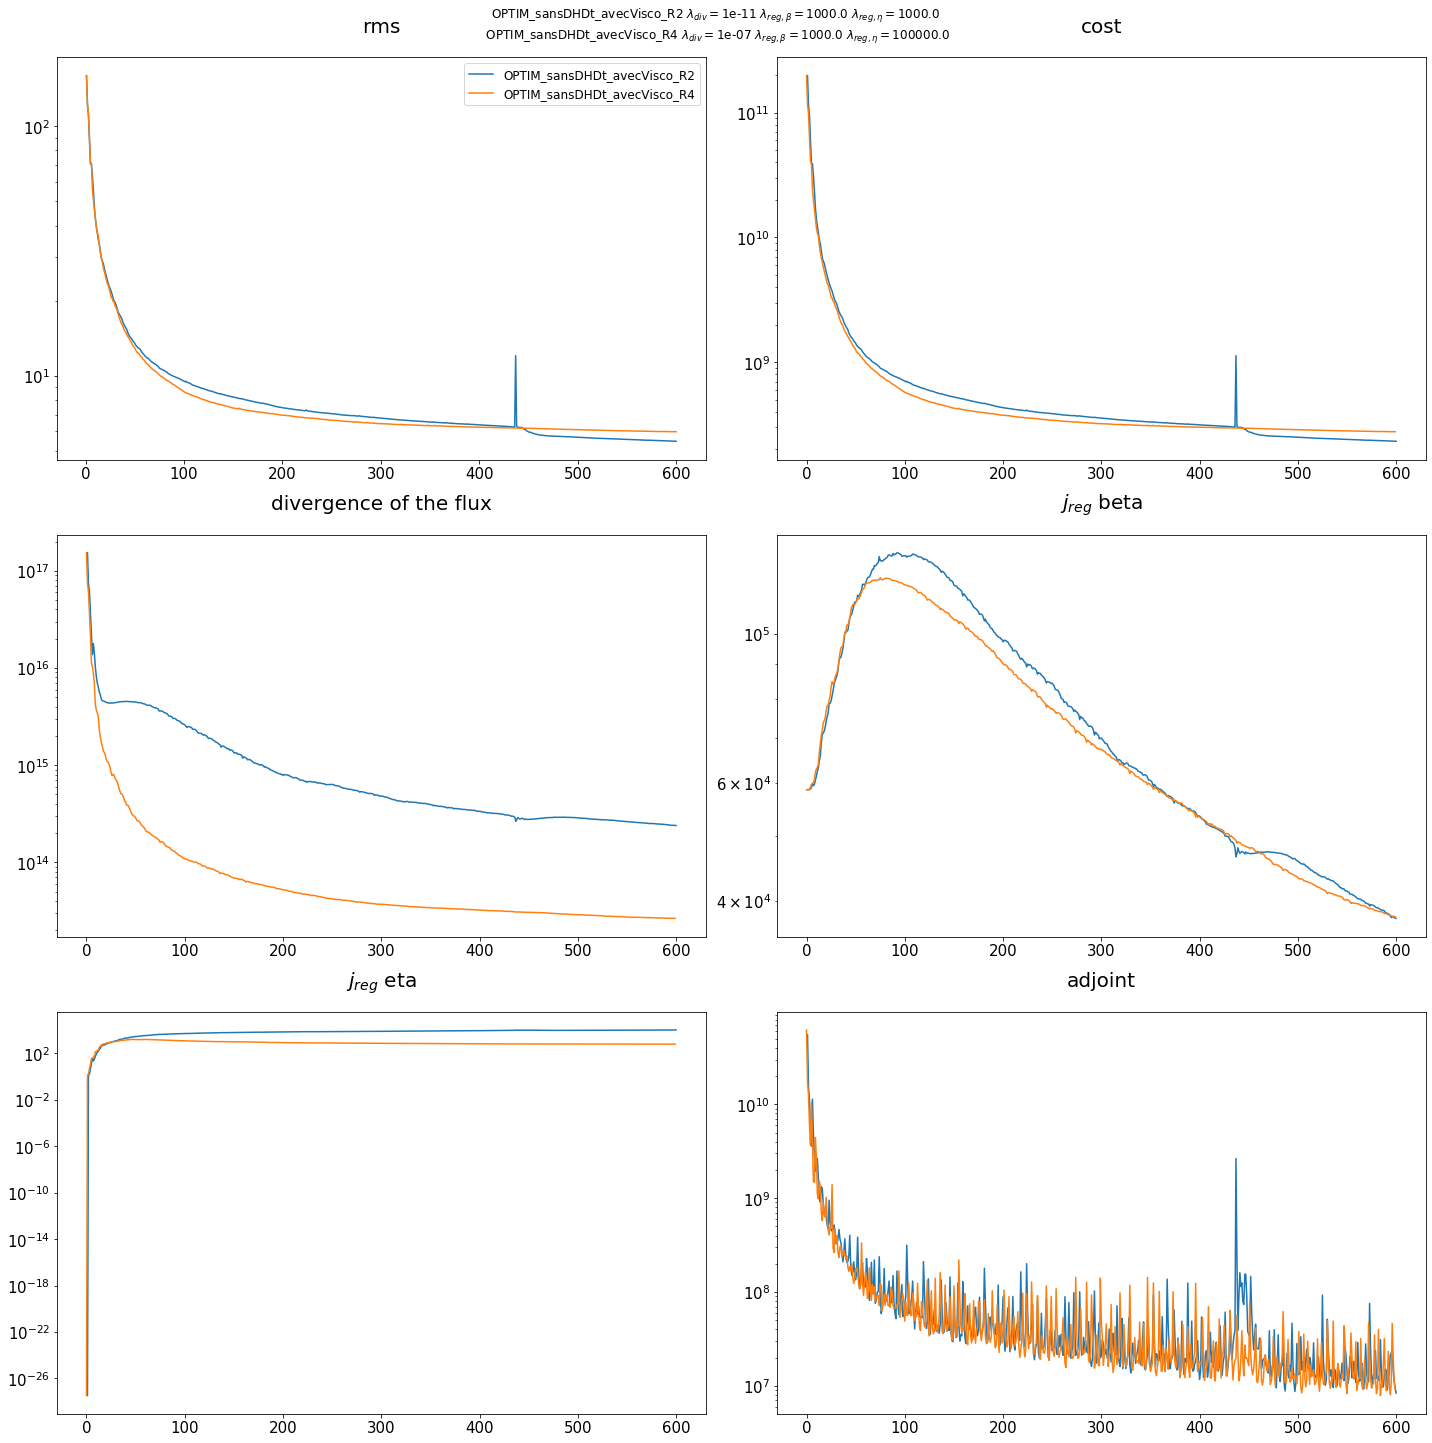

In [3]:
fig = plt.figure(figsize=(20, 20))
fig.suptitle(str(url[80:-1]) + r' $\lambda_{div}=$' + str(lregdhdt) + r' $\lambda_{reg,\beta}=$' + str(lregbeta) + r' $\lambda_{reg,\eta}=$' + str(
    lregeta) + ' \n ' + str(url1[80:-1]) + r' $\lambda_{div}=$' + str(lregdhdt1) + r' $\lambda_{reg,\beta}=$' + str(lregbeta1) + r' $\lambda_{reg,\eta}=$' + str(lregeta1),y=1)
ax1 = plt.subplot(3, 2, 1)
ax1.semilogy(iteration, rms, label=url[80:-1])
ax1.semilogy(iteration, rms1, label=url1[80:-1])
ax1.legend()
ax1.set_title('rms')
ax2 = plt.subplot(3, 2, 2)
ax2.semilogy(iteration, cost, cost1)
ax2.set_title('cost')
ax3 = plt.subplot(3, 2, 3)
ax3.semilogy(iteration, Jdiv, Jdiv1)
ax3.set_title('divergence of the flux')
ax4 = plt.subplot(3, 2, 4)
ax4.semilogy(iteration, jregbeta, jregbeta1)
ax4.set_title(r'$j_{reg}$ beta')
ax5 = plt.subplot(3, 2, 5)
ax5.semilogy(iteration, jregeta, jregeta1)
ax5.set_title(r'$j_{reg}$ eta')
ax6 = plt.subplot(3, 2, 6)
ax6.semilogy(iteration, adjoint, adjoint1)
ax6.set_title('adjoint')
plt.tight_layout()

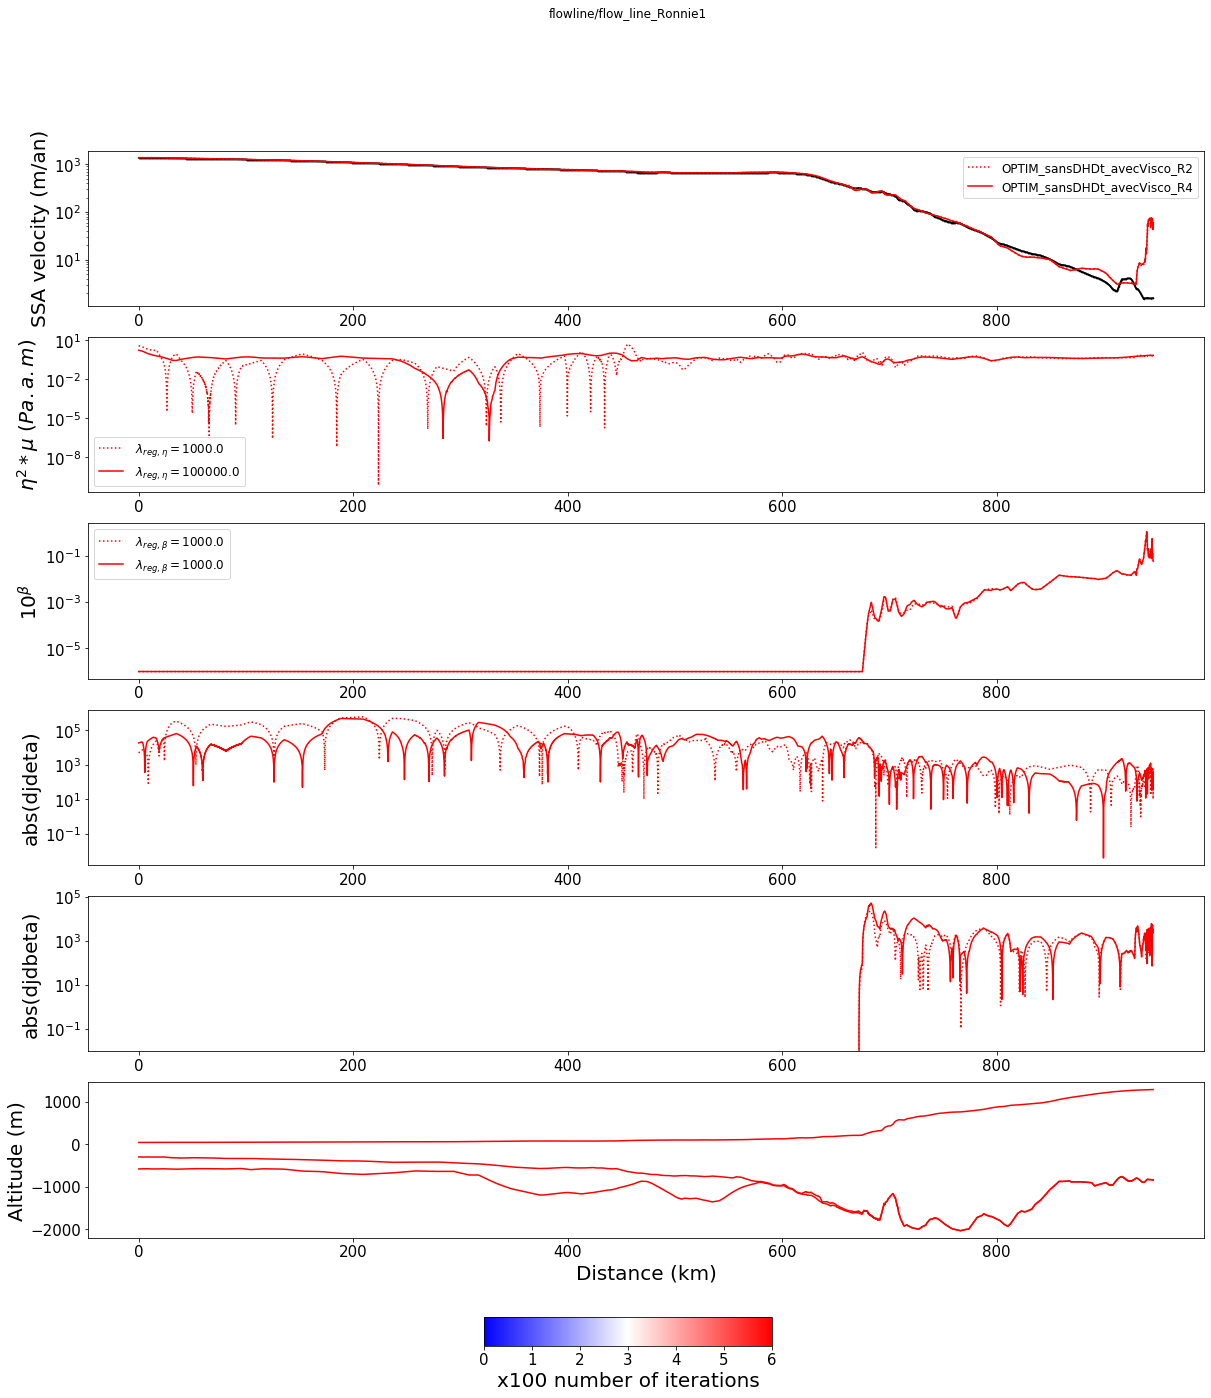

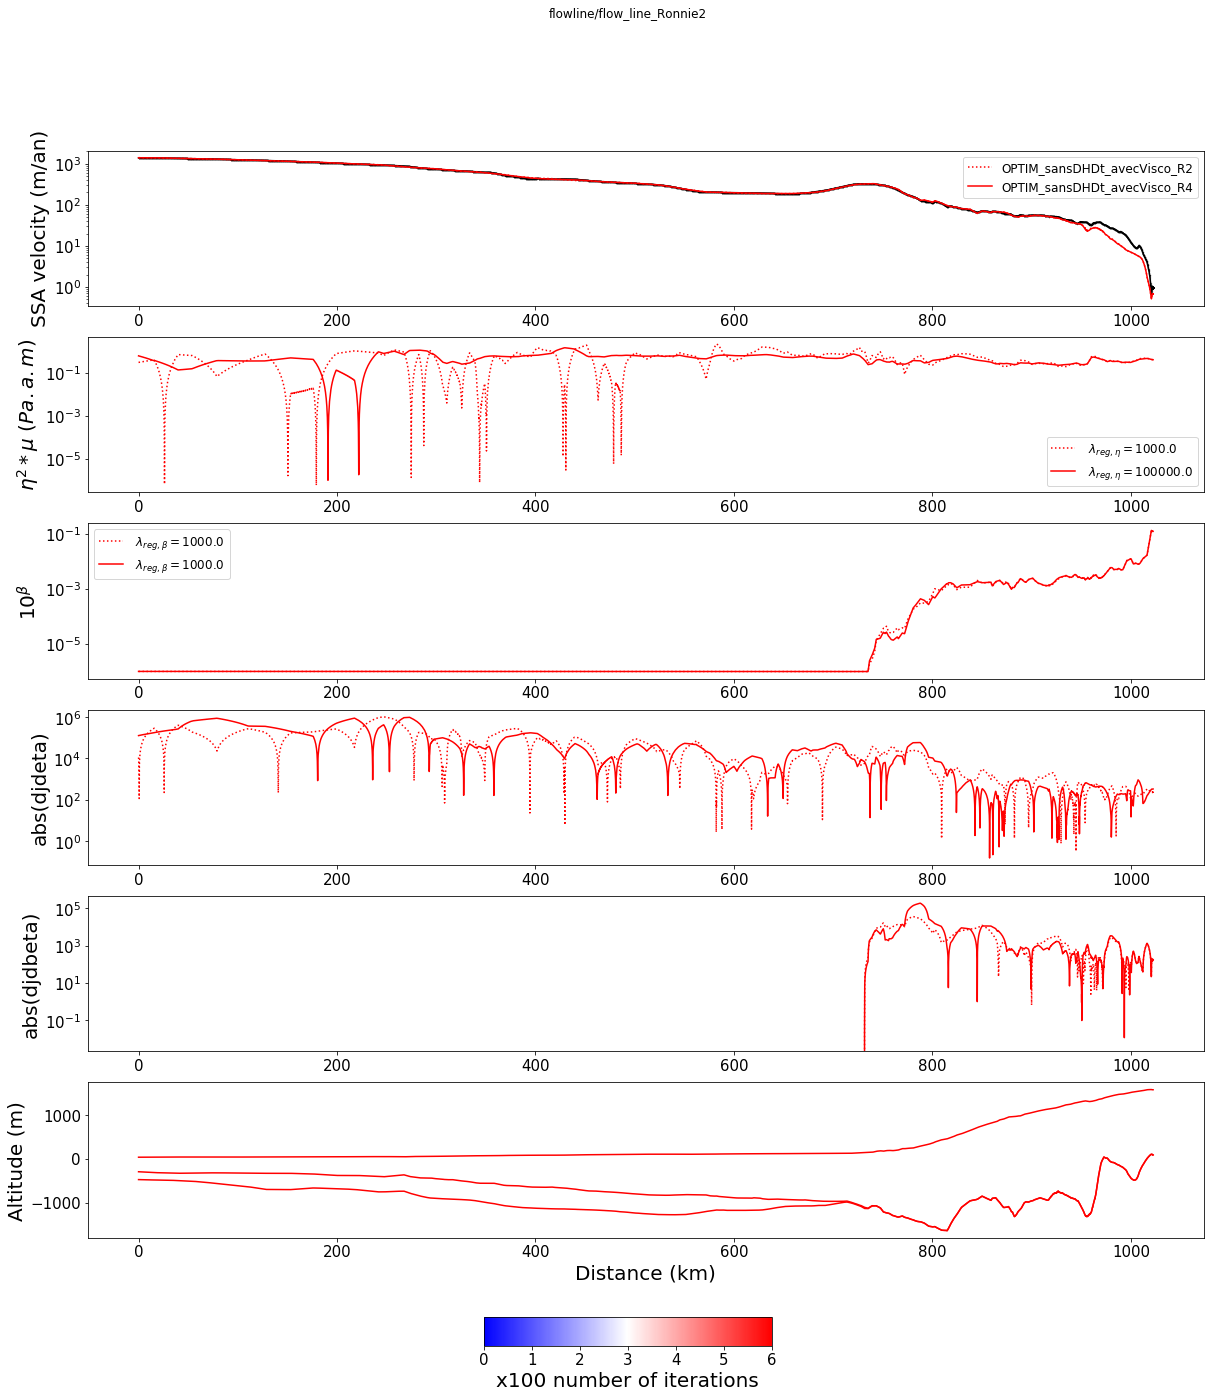

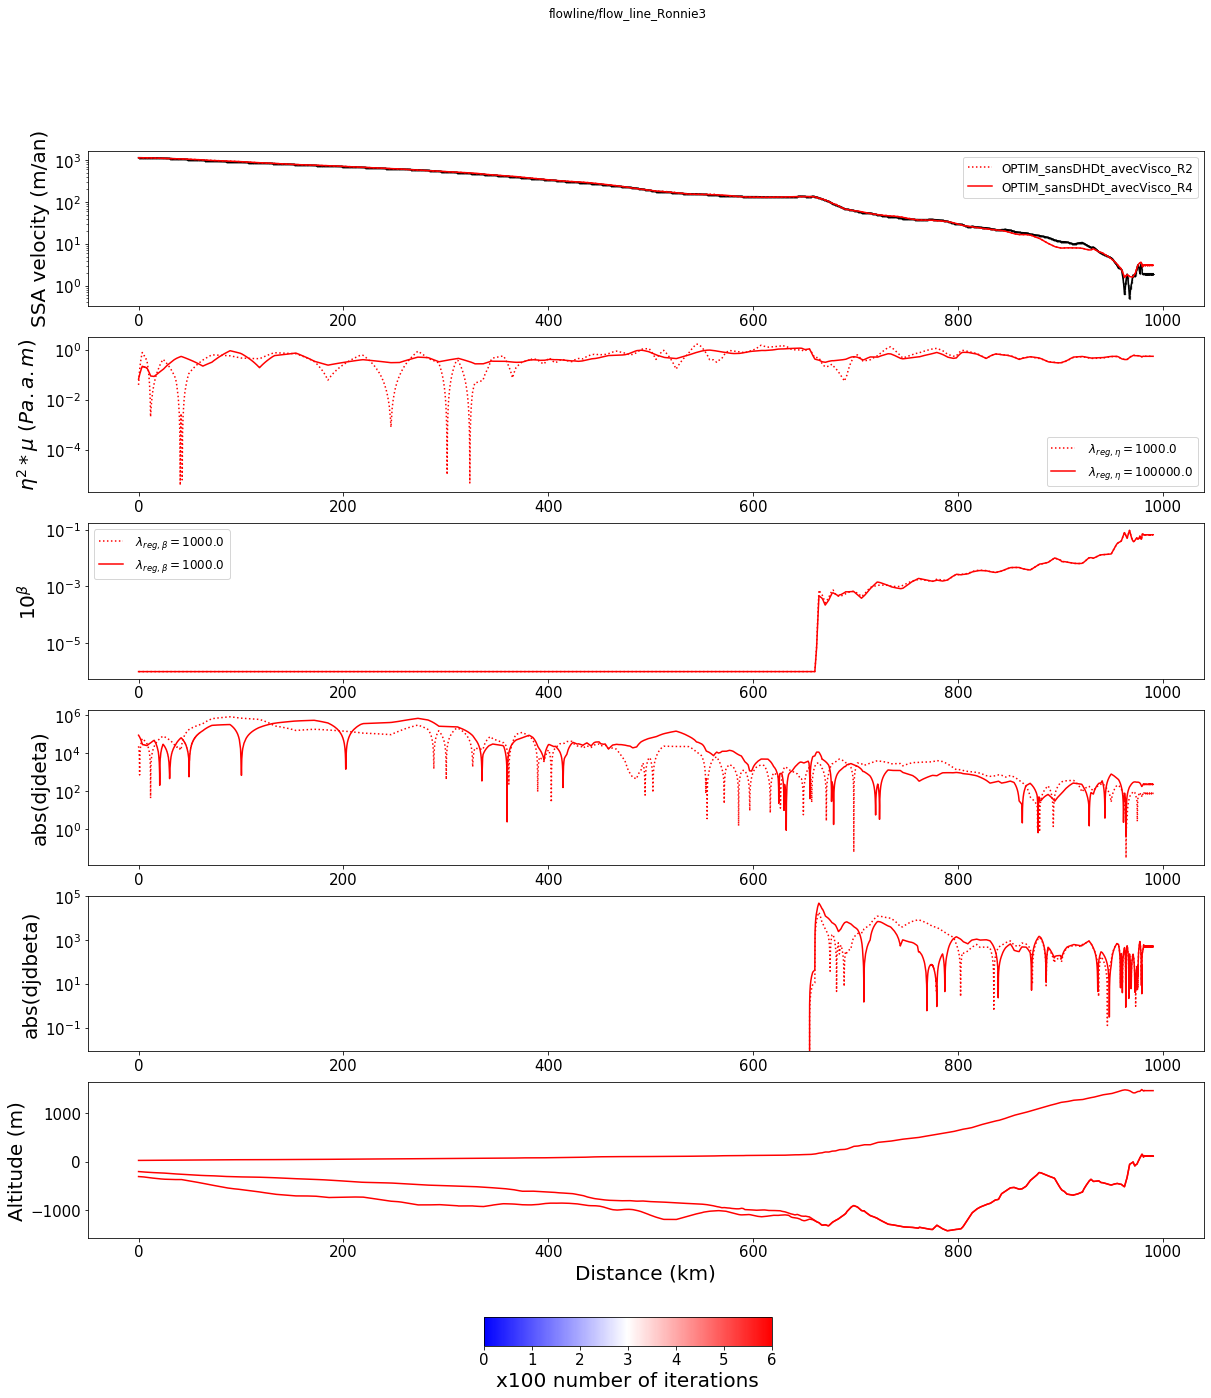

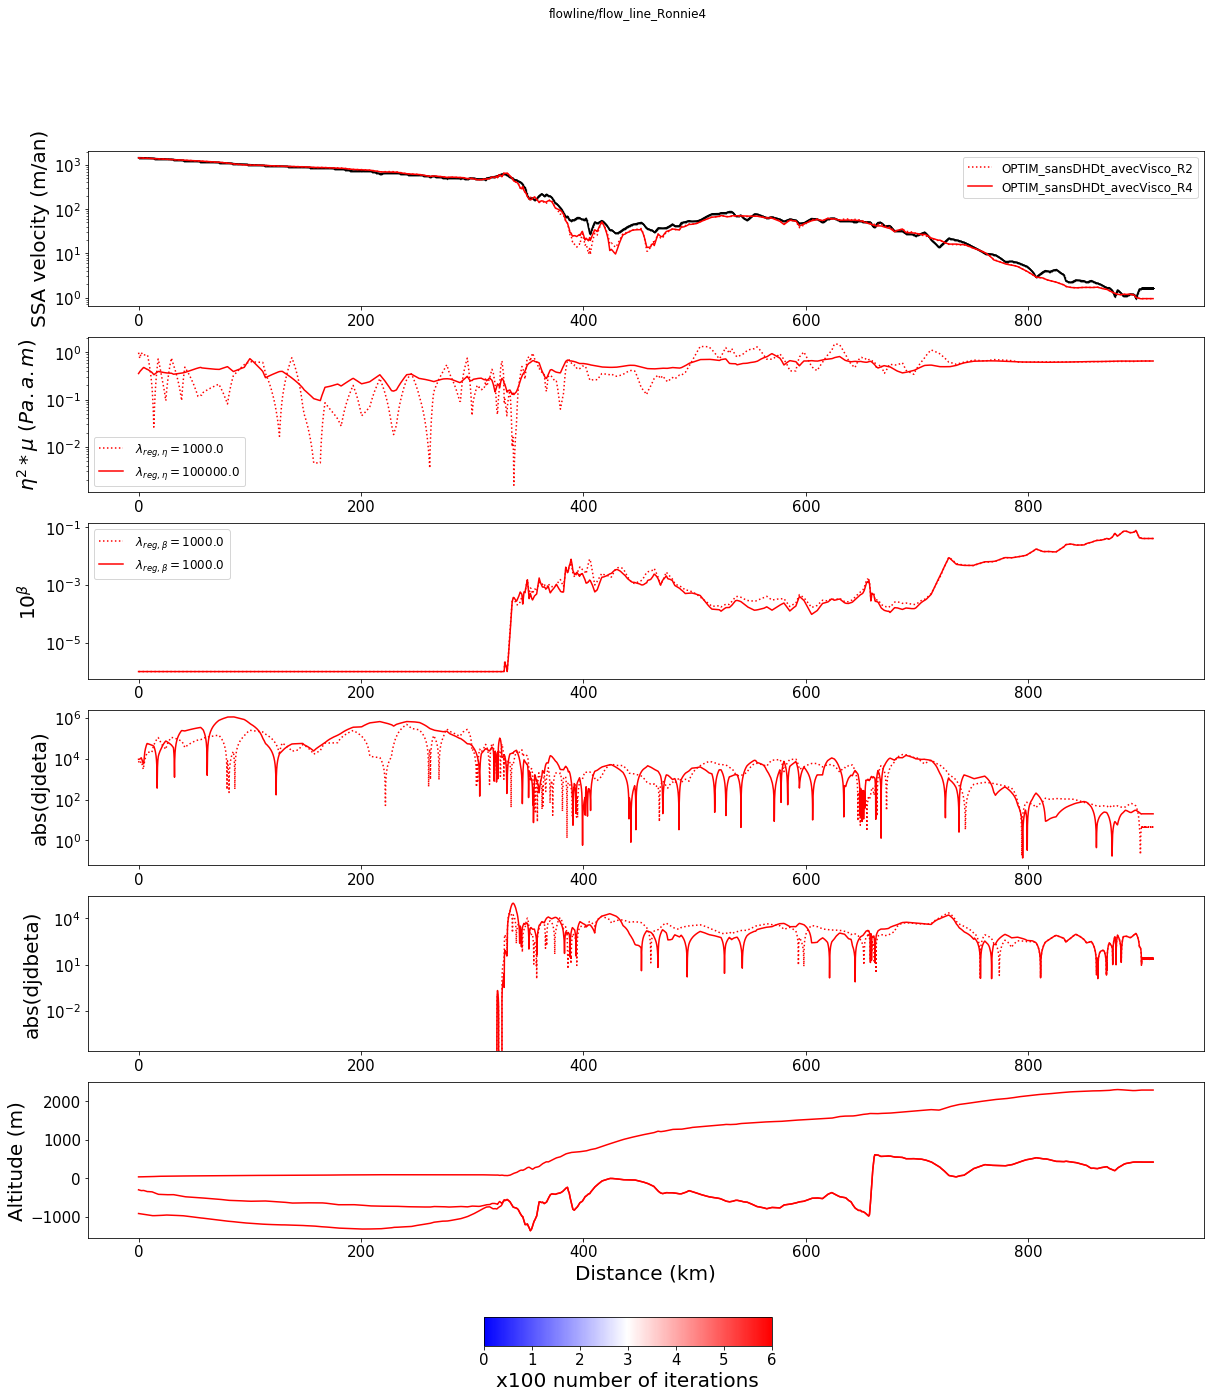

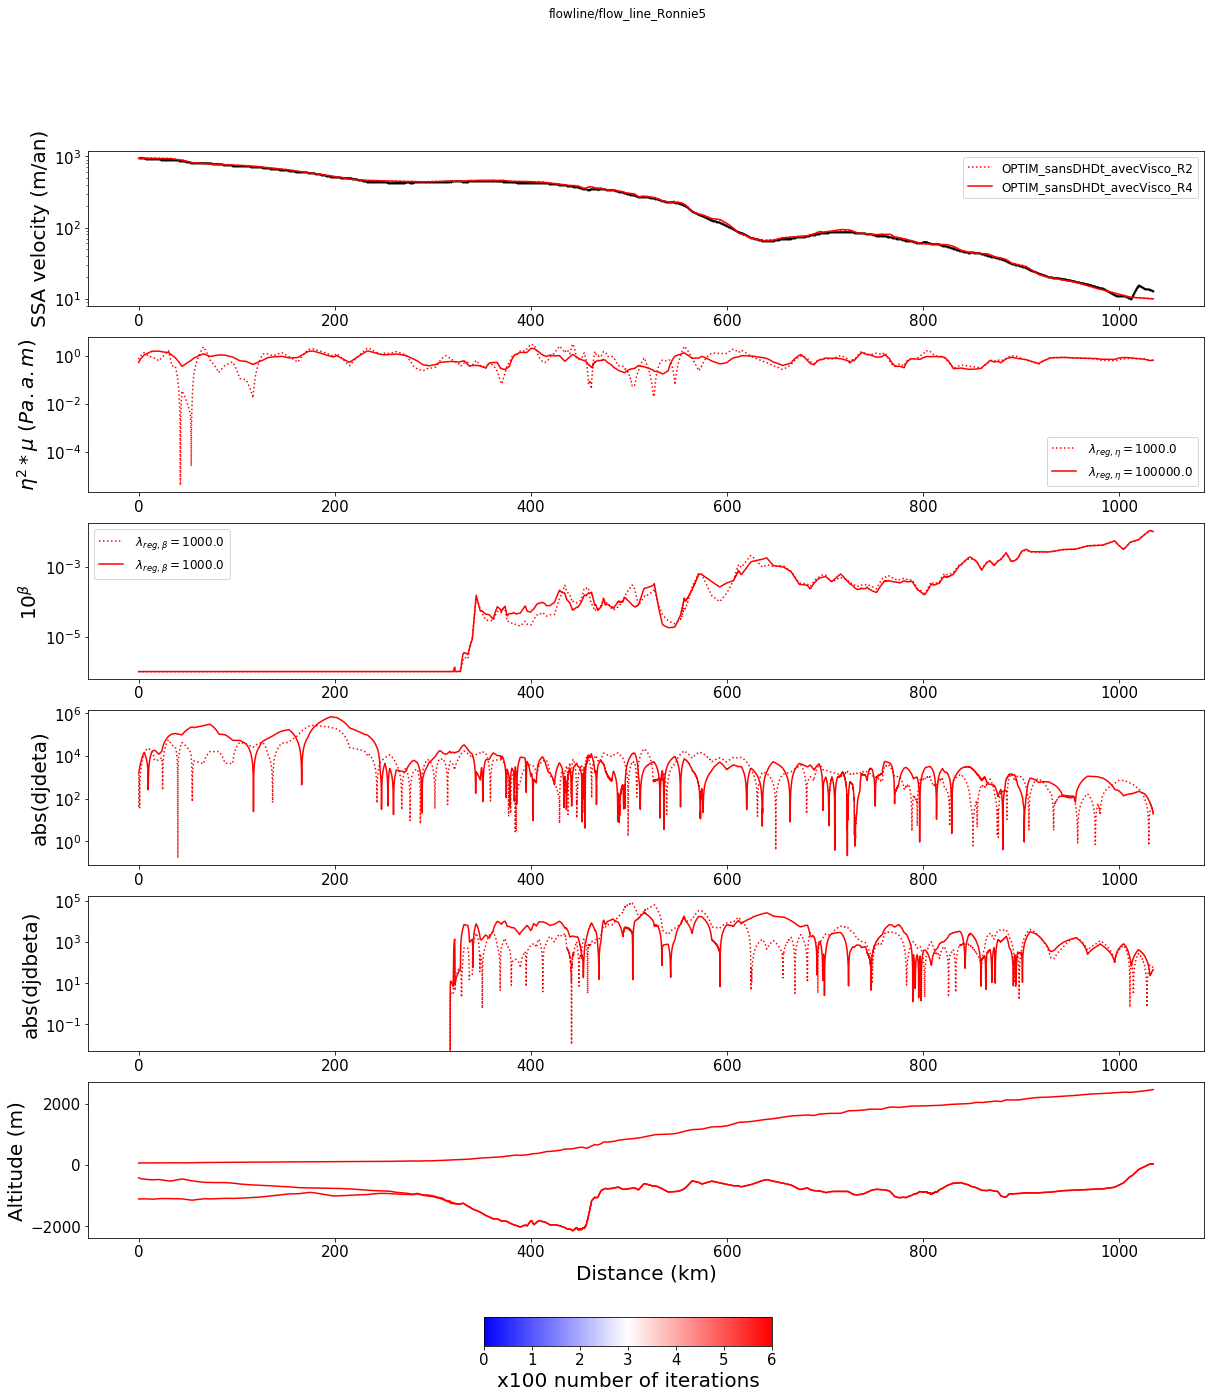

In [12]:
colors = plt.cm.bwr(np.linspace(0,1,len(blocks)))

import matplotlib as mpl

for n in range(0,len(flowlines)):
    xx=flowlines[n][52:-4]
    fig=plt.figure(figsize=[20,20])
   
    ax1=plt.subplot(6,1,1)
    ax2=plt.subplot(6,1,2)
    ax3=plt.subplot(6,1,3)
    ax6=plt.subplot(6,1,4)
    ax5=plt.subplot(6,1,5)
    ax4=plt.subplot(6,1,6)
    ax1.semilogy(globals()[xx]['dist'],globals()[xx]['uobs_mag'][0,],c='k',marker='.',markersize=0.5)
    for n in range(6,len(blocks)):
        ax1.semilogy(globals()[xx]['dist'],globals()[xx]['ssavelocity_mag'][n,],color=colors[n],linestyle=':',label=url[80:-1])
        ax1.semilogy(globals()[xx]['dist'],globals()[xx]['ssavelocity_mag1'][n,],color=colors[n],label=url1[80:-1])
        ax1.legend()
        ax1.set_ylabel('SSA velocity (m/an)')        
        
        ax2.semilogy(globals()[xx]['dist'],globals()[xx]['eta'][n,]**2*globals()[xx]['mu'][n,],color=colors[n],linestyle=':',label=r' $\lambda_{reg,\eta}=$' + str(lregeta))
        ax2.semilogy(globals()[xx]['dist'],globals()[xx]['eta1'][n,]**2*globals()[xx]['mu1'][n,],color=colors[n],label=r' $\lambda_{reg,\eta}=$' + str(lregeta1))
        ax2.set_ylabel('$\eta^2 * \mu$ ($Pa.a.m$)')    
        ax2.legend()
        
        ax3.semilogy(globals()[xx]['dist'],10**globals()[xx]['beta'][n,],color=colors[n],linestyle=':',label=r' $\lambda_{reg,\beta}=$' + str(lregbeta))
        ax3.semilogy(globals()[xx]['dist'],10**globals()[xx]['beta1'][n,],color=colors[n],label=r' $\lambda_{reg,\beta}=$' + str(lregbeta1))
        ax3.set_ylabel(r'$10^\beta$')
        ax3.legend()
                
        ax5.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdbeta'][n,]),color=colors[n],linestyle=':')
        ax5.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdbeta1'][n,]),color=colors[n])
        ax5.set_ylabel('abs(djdbeta)')
        
        ax6.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdeta'][n,]),color=colors[n],linestyle=':')
        ax6.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdeta1'][n,]),color=colors[n])
        ax6.set_ylabel('abs(djdeta)')
        
        im=ax4.plot(globals()[xx]['dist'],globals()[xx]['zs'][n,],color=colors[n])
        ax4.plot(globals()[xx]['dist'],globals()[xx]['bedrock'][n,],color=colors[n])
        ax4.plot(globals()[xx]['dist'],globals()[xx]['zb'][n,],color=colors[n],label=str(n))
        ax4.set_xlabel('Distance (km)')
        ax4.set_ylabel('Altitude (m)')

        ax7=fig.add_subplot(position=[0.4, 0.05, 0.2, 0.02])

        cmap = mpl.cm.bwr
        norm = mpl.colors.Normalize(vmin=0, vmax=len(blocks)-1)

        cb1 = mpl.colorbar.ColorbarBase(ax7, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label('x100 number of iterations')
        
    fig.suptitle(str(xx))
    

